Epoch 1/100
4/4 [==============================] - 1s 157ms/step - loss: 1.1040 - accuracy: 0.3083 - val_loss: 1.0990 - val_accuracy: 0.2459
Epoch 2/100
4/4 [==============================] - 0s 87ms/step - loss: 1.0985 - accuracy: 0.3583 - val_loss: 1.1000 - val_accuracy: 0.2131
Epoch 3/100
4/4 [==============================] - 0s 93ms/step - loss: 1.0982 - accuracy: 0.3667 - val_loss: 1.1007 - val_accuracy: 0.2131
Epoch 4/100
4/4 [==============================] - 0s 93ms/step - loss: 1.0980 - accuracy: 0.3667 - val_loss: 1.1015 - val_accuracy: 0.2131
Epoch 5/100
4/4 [==============================] - 0s 91ms/step - loss: 1.0979 - accuracy: 0.3667 - val_loss: 1.1022 - val_accuracy: 0.2131
Epoch 6/100
4/4 [==============================] - 0s 89ms/step - loss: 1.0977 - accuracy: 0.3667 - val_loss: 1.1029 - val_accuracy: 0.2131
Epoch 7/100
4/4 [==============================] - 0s 90ms/step - loss: 1.0975 - accuracy: 0.3667 - val_loss: 1.1034 - val_accuracy: 0.2131
Epoch 8/100
4/4 [==

4/4 [==============================] - 0s 98ms/step - loss: 1.0950 - accuracy: 0.3667 - val_loss: 1.1228 - val_accuracy: 0.2131
Epoch 60/100
4/4 [==============================] - 0s 103ms/step - loss: 1.0950 - accuracy: 0.3667 - val_loss: 1.1231 - val_accuracy: 0.2131
Epoch 61/100
4/4 [==============================] - 0s 111ms/step - loss: 1.0950 - accuracy: 0.3667 - val_loss: 1.1233 - val_accuracy: 0.2131
Epoch 62/100
4/4 [==============================] - 0s 113ms/step - loss: 1.0950 - accuracy: 0.3667 - val_loss: 1.1233 - val_accuracy: 0.2131
Epoch 63/100
4/4 [==============================] - 1s 126ms/step - loss: 1.0950 - accuracy: 0.3667 - val_loss: 1.1235 - val_accuracy: 0.2131
Epoch 64/100
4/4 [==============================] - 1s 130ms/step - loss: 1.0950 - accuracy: 0.3667 - val_loss: 1.1237 - val_accuracy: 0.2131
Epoch 65/100
4/4 [==============================] - 0s 100ms/step - loss: 1.0950 - accuracy: 0.3667 - val_loss: 1.1239 - val_accuracy: 0.2131
Epoch 66/100
4/4 [==

'00:00:52'

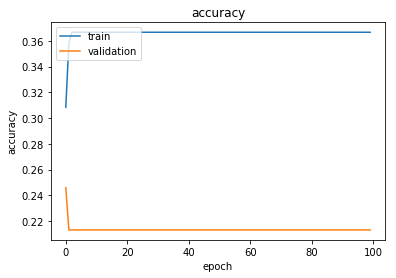

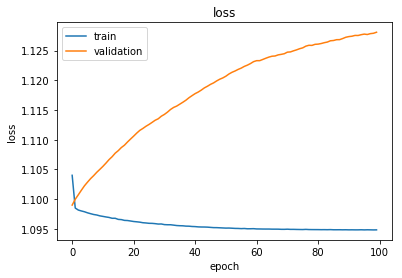

In [8]:
import numpy as np
import os
import random
import pickle
import matplotlib.pyplot as plt
import cv2
import time

DATADIR = "C:\\Users\\Asia\\data1\\train"

CATEGORIES = ["diabetic_retinopathy", "glaucoma", "healthy" ]

for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        break
    break
#print(img_array)
#print(img_array.shape)


IMG_SIZE = 50
training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                output = cv2.medianBlur(new_array, 5)
                th2 = cv2.adaptiveThreshold(output,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY_INV,11,2)
                training_data.append([th2, class_num])
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)

X = [] 
y = [] 


for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

pickle_out = open("X1.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y1.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X1.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y1.pickle","rb")
y = pickle.load(pickle_in)
###########################################
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import time

start_time = time.time()
X = pickle.load(open("X1.pickle", "rb"))
y = pickle.load(open("y1.pickle", "rb"))


X = X/255.0
y = np.array(y)

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("relu"))

model.add(Dense(3))
model.add(Activation("softmax"))


model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


history = model.fit(X, y, batch_size=64, epochs=100, validation_split=0.2)
#batch 32 lub 64
#epoch 100, 500, 1000

model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
elapsed_time = time.time() - start_time
time.strftime("%H:%M:%S", time.gmtime(elapsed_time))